<a href="https://colab.research.google.com/github/harikrish2727/malaria-detector-using-cnn/blob/main/malaria_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


import os

In [ ]:
data_path = r"C:\Users\Vishnu\Desktop\cell_images"

In [ ]:
os.listdir(data_path)

['.ipynb_checkpoints', 'malaria_detector.ipynb', 'test', 'train']

In [ ]:
os.listdir(data_path+"\\test")

['parasitized', 'uninfected']

In [ ]:
os.listdir(data_path+"\\train")

['parasitized', 'uninfected']

In [ ]:
train_path = data_path+"\\train"

In [ ]:
test_path = data_path+"\\test"

In [ ]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path+"\\parasitized")[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [ ]:
os.listdir(test_path+"\\uninfected")[0]

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [ ]:
sample = train_path+"\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [ ]:
sample_uninfected = test_path+"\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_34.png"

In [ ]:
from matplotlib.image import imread

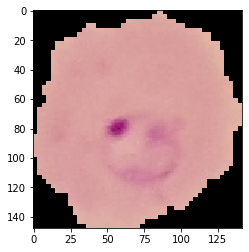

In [ ]:
plt.imshow(imread(sample))

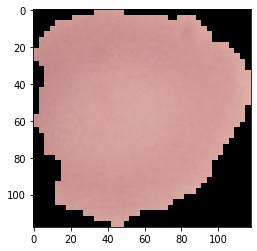

In [ ]:
plt.imshow(imread(sample_uninfected))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             channel_shift_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
train_gen = img_gen.flow_from_directory(r"C:\Users\Vishnu\Desktop\cell_images\train",
                                        target_size=(64,64),
                                        class_mode="binary",
                                        batch_size=32)

Found 24958 images belonging to 2 classes.


In [ ]:
test_gen = img_gen.flow_from_directory(test_path,
                                      target_size=(64,64),
                                      class_mode="binary",
                                      batch_size=32,
                                      shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=4,activation="relu",strides=2,input_shape=(64,64,3)))

In [ ]:
model.add(MaxPool2D(pool_size=3))      

In [ ]:
model.add(Conv2D(filters=64,kernel_size=4,activation="relu",strides=2))

In [ ]:
model.add(MaxPool2D(pool_size=3))

In [ ]:
model.add(Flatten()) 

In [ ]:
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
          
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.4))
          
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
          
model.add(Dense(units=32,activation="relu"))
          
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(patience=1,monitor="val_loss")

In [ ]:
model.fit(train_gen,epochs=5,verbose=1,validation_data=test_gen,callbacks=early)

Epoch 1/5
780/780 [==============================] - 1908s 2s/step - loss: 1.0942 - accuracy: 0.5173 - val_loss: 0.4854 - val_accuracy: 0.7804
Epoch 2/5
780/780 [==============================] - 1974s 3s/step - loss: 0.4279 - accuracy: 0.8207 - val_loss: 0.4160 - val_accuracy: 0.8208
Epoch 3/5
780/780 [==============================] - 3180s 4s/step - loss: 0.3839 - accuracy: 0.8399 - val_loss: 0.3772 - val_accuracy: 0.8454
Epoch 4/5
780/780 [==============================] - 1605s 2s/step - loss: 0.3562 - accuracy: 0.8586 - val_loss: 0.3787 - val_accuracy: 0.8496


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("malaria_detection.h5")

In [ ]:
import pandas as pd

In [ ]:
loss = pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.735808,0.579013,0.485361,0.780385
1,0.405965,0.831717,0.415966,0.820769
2,0.371777,0.845140,0.377212,0.845385
3,0.358373,0.856118,0.378733,0.849615


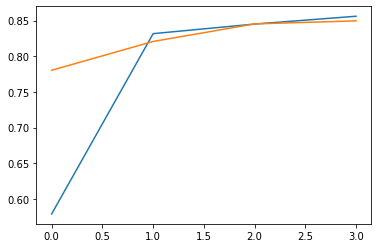

In [ ]:
plt.plot(loss[["accuracy","val_accuracy"]]);

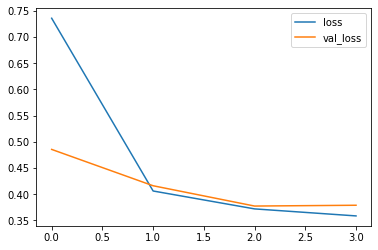

In [ ]:
loss[["loss","val_loss"]].plot();

# predicting on single Image

In [ ]:
os.listdir(data_path)

['.ipynb_checkpoints',
 'malaria_detection.h5',
 'malaria_detector.ipynb',
 'single_image',
 'test',
 'train']

In [ ]:
single_image = data_path+"\\single_image"

In [ ]:
os.listdir(single_image)

['C1_thinF_IMG_20150604_104722_cell_66.png',
 'C39P4thinF_original_IMG_20150622_105803_cell_109.png']

In [ ]:
test_image1 = single_image+"\\C1_thinF_IMG_20150604_104722_cell_66.png"

In [ ]:
test_image1

'C:\\Users\\Vishnu\\Desktop\\cell_images\\single_image\\C1_thinF_IMG_20150604_104722_cell_66.png'

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
test_image1 = image.load_img(test_image1,target_size=(64,64,3))

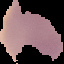

In [ ]:
test_image1

In [ ]:
test_image1_array = image.img_to_array(test_image1)

In [ ]:
test_image1_array.shape

(64, 64, 3)

In [ ]:
test_image_1 = np.expand_dims(test_image1_array,axis=0)

In [ ]:
test_image_1.shape

(1, 64, 64, 3)

In [ ]:
model.predict_classes(test_image_1)

C:\Users\Vishnu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [ ]:
train_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
test_image2 = single_image+"\\C39P4thinF_original_IMG_20150622_105803_cell_109.png"

In [ ]:
test_image2 = image.load_img(test_image2,target_size=(64,64,3))

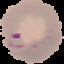

In [ ]:
test_image2

In [ ]:
type(test_image2)

PIL.Image.Image

In [ ]:
test_image2 = image.img_to_array(test_image2)

In [ ]:
type(test_image2)

numpy.ndarray

In [ ]:
test_image2.shape

(64, 64, 3)

In [ ]:
test_image2 = np.expand_dims(test_image2,axis=0)

In [ ]:
test_image2.shape

(1, 64, 64, 3)

In [ ]:
model.predict_classes(test_image2)

C:\Users\Vishnu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])

In [ ]:
train_gen.class_indices

{'parasitized': 0, 'uninfected': 1}